In [2]:
% reset
% config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import patsy
import statsmodels.formula.api as smf
from sklearn import decomposition

% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
sns.set(style='whitegrid', context ='paper')

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [3]:
# make height, and make weight a function of height plus a little noise to make them highly correlated
height = np.random.normal(160, 2, 1000)
weight = (height - 20) / 2
weight = weight + np.random.normal(0, 0.5, 1000)

height = height.T
weight = weight.T

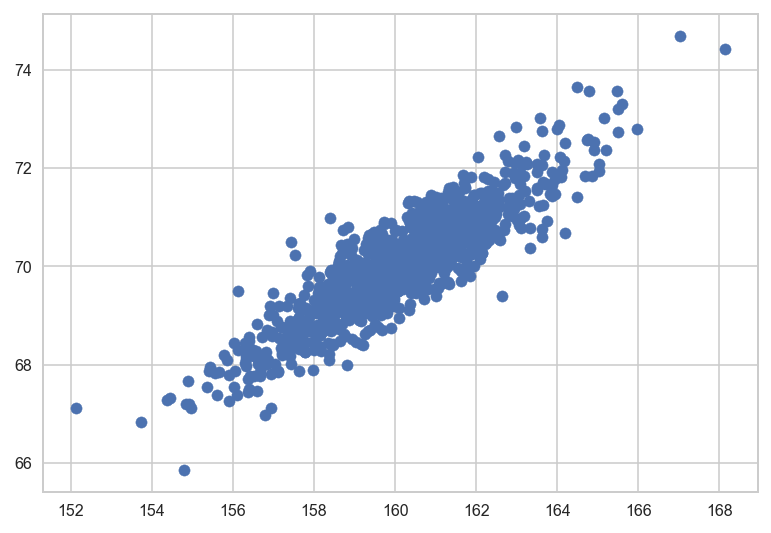

In [4]:
plt.scatter(height, weight)
plt.show()

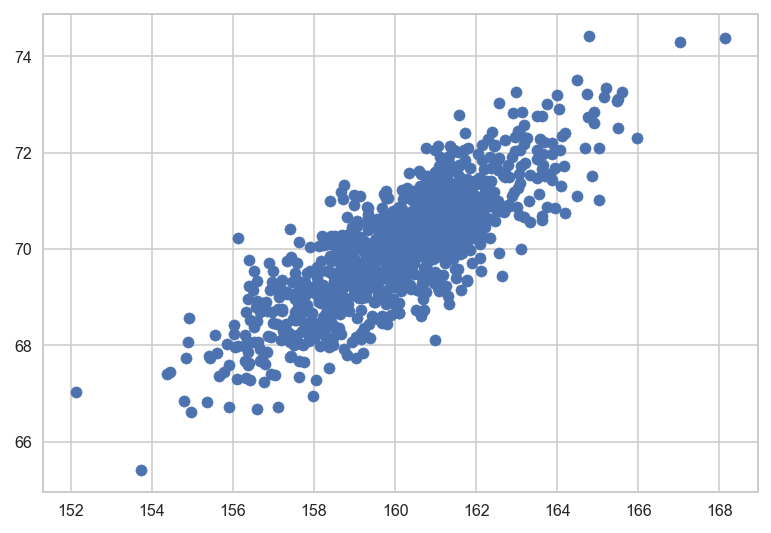

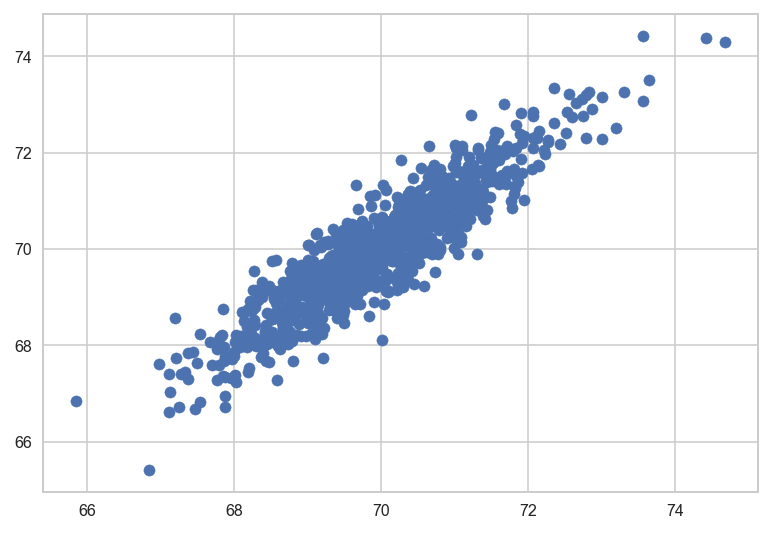

In [5]:
# now make something that correlates with them both

correlated = weight + np.random.normal(0, 0.5, 1000)

plt.scatter(height, correlated)
plt.show()

plt.scatter(weight, correlated)
plt.show()

In [6]:
df = pd.DataFrame([correlated, height, weight]).T

mod = smf.ols(formula='correlated ~ height + weight', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             correlated   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     2492.
Date:                Mon, 12 Jun 2017   Prob (F-statistic):               0.00
Time:                        16:05:48   Log-Likelihood:                -736.92
No. Observations:                1000   AIC:                             1480.
Df Residuals:                     997   BIC:                             1495.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0651      1.316     -0.049      0.9

In [7]:
pca = decomposition.PCA(n_components=1)
height_weight = pca.fit_transform(df[[1, 2]])

# don't worry about this, just sometimes the dimensionality reduction can change the sign of the relationship
if pca.score(df[[1, 2]]) < 0:
    height_weight = -height_weight

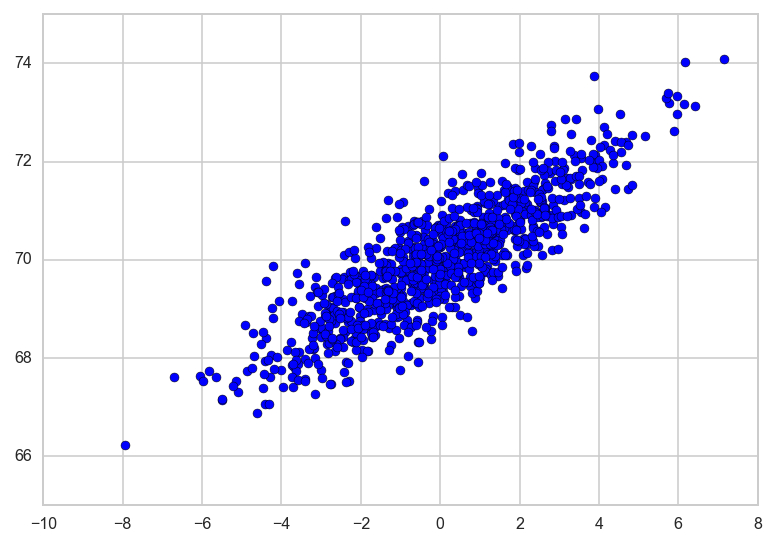

In [140]:
# here we used PCA to reduces two variables--height and weight--into one new variable
# this new vriable optimally captures them both, and correlates with our variable "correlated"
# this is good because we MADE that variable so that it would correlate with them both

plt.scatter(height_weight, correlated)
plt.show()